In [51]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
# from torch.autograd 
import matplotlib.pyplot as plt

In [52]:
num_data = 1000
num_epoch = 5000

x = init.uniform(torch.Tensor(num_data,1), -15,15)
y = x**2 + 3
noise = init.normal(torch.Tensor(num_data,1),std=5)

y_noise = y + noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  


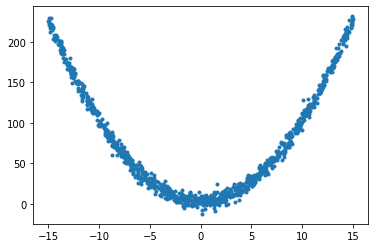

In [53]:
plt.plot(x,y_noise,'.')
plt.show()

In [67]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,15),
    nn.ReLU(),
    nn.Linear(15,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0005)

In [69]:
model[0].bias

Parameter containing:
tensor([ 0.7185, -0.1788, -0.9693,  0.5526, -0.2126,  0.6786],
       requires_grad=True)

In [55]:
loss_arr = []
label = y_noise

for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output,label)
  loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print(loss)

  loss_arr.append(loss.data.numpy())

tensor(75.7474, grad_fn=<L1LossBackward>)
tensor(75.6868, grad_fn=<L1LossBackward>)
tensor(75.6235, grad_fn=<L1LossBackward>)
tensor(75.5570, grad_fn=<L1LossBackward>)
tensor(75.4880, grad_fn=<L1LossBackward>)
tensor(75.4168, grad_fn=<L1LossBackward>)
tensor(75.3430, grad_fn=<L1LossBackward>)
tensor(75.2663, grad_fn=<L1LossBackward>)
tensor(75.1859, grad_fn=<L1LossBackward>)
tensor(75.1011, grad_fn=<L1LossBackward>)
tensor(75.0106, grad_fn=<L1LossBackward>)
tensor(74.9136, grad_fn=<L1LossBackward>)
tensor(74.8079, grad_fn=<L1LossBackward>)
tensor(74.6907, grad_fn=<L1LossBackward>)
tensor(74.5586, grad_fn=<L1LossBackward>)
tensor(74.4056, grad_fn=<L1LossBackward>)
tensor(74.2208, grad_fn=<L1LossBackward>)
tensor(73.9845, grad_fn=<L1LossBackward>)
tensor(73.6544, grad_fn=<L1LossBackward>)
tensor(73.1205, grad_fn=<L1LossBackward>)
tensor(72.0095, grad_fn=<L1LossBackward>)
tensor(68.0731, grad_fn=<L1LossBackward>)
tensor(36.1258, grad_fn=<L1LossBackward>)
tensor(19.9637, grad_fn=<L1LossBac

In [56]:
param_list = list(model.parameters())
print(param_list)

[Parameter containing:
tensor([[ 0.2768],
        [-0.6615],
        [ 0.7003],
        [ 0.0328],
        [ 0.6940],
        [-0.3715]], requires_grad=True), Parameter containing:
tensor([ 1.1575, -1.7172, -0.9457, -0.6642, -0.8520,  0.3913],
       requires_grad=True), Parameter containing:
tensor([[-0.0590,  0.8003, -0.2132, -0.3929, -0.1863,  0.4278],
        [ 0.0826, -0.2855, -0.1570, -0.2529, -0.3182,  0.0393],
        [-0.2047, -0.2415, -0.1256,  0.3866,  0.1414, -0.0047],
        [-0.1268,  0.0192, -0.4049, -0.1047,  0.3489, -0.0168],
        [-0.0867,  0.5675,  0.4211, -0.1766,  0.1806, -0.2403],
        [-0.1851,  0.5337,  0.0834, -0.3310, -0.0224,  0.1370],
        [ 0.0912, -0.2385, -0.1231, -0.3199, -0.3563, -0.1041],
        [ 0.2656, -0.0345, -0.1948, -0.2653, -0.3648, -0.2899],
        [-0.0301, -0.0729,  0.6012, -0.1337,  0.5130, -0.2342],
        [-0.7164,  0.6006,  0.4341,  0.3143,  0.2495, -0.1542]],
       requires_grad=True), Parameter containing:
tensor([-0.3255

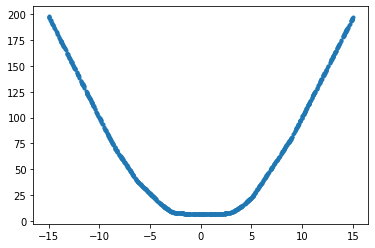

In [57]:
plt.plot(x,model(x).detach().numpy(),'.')
plt.show()

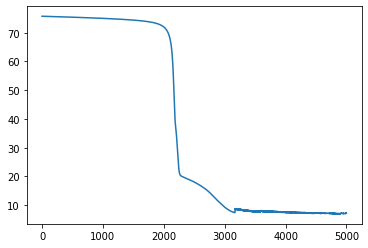

In [58]:
plt.plot(loss_arr)
plt.show()